In [0]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import math
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Multi Arm Bandit Class

In [0]:
import numpy as np
from tqdm import tqdm
import math

class banditClass:

	def __init__(self,k=10,numberOfIterations=1000,numberOfbandits=200,actionType = "normal",
					nonStationary=False,epsilon = 0.1,alphaUpdateRule=False,optimalConditions=False):

		self.k=k
		self.numberOfIterations = numberOfIterations
		self.numberOfbandits = numberOfbandits
		self.actionType = actionType
		self.nonStationary = nonStationary
		self.epsilon = epsilon
		self.alphaUpdateRule = alphaUpdateRule
		self.optimalConditions = optimalConditions
		
		self.alpha=0.1
		self.UCBc = 2.0



		if(self.nonStationary==False):
			self.totalBanditDistribution = np.random.normal(0,1,(self.numberOfbandits,self.k))
		else: 
			
			oneArmTotalDistribution = np.random.normal(0,1,self.k)
			# print(oneArmTotalDistribution.shape)
			self.totalBanditDistribution = np.ones((self.numberOfbandits,self.k))*oneArmTotalDistribution
			# print(self.totalBanditDistribution.shape)
			

		if(self.optimalConditions==True):
				self.Q = np.ones((self.numberOfbandits,self.k))*5.0

		else:		
			self.Q = np.zeros((self.numberOfbandits,self.k))

		self.N = np.zeros((self.numberOfbandits,self.k))
		self.trueOptimalActions =np.argmax(self.totalBanditDistribution,1)

		self.printCondtions()



	def printCondtions(self):
		print("*"*80)
		print("EPSILON: ",	self.epsilon)
		print("NON-STATIONARY: ",self.nonStationary)
		print("ACTION TYPE: ",	self.actionType)
		print("ALPHA UPDATE RULE: ",self.alphaUpdateRule)
		print("OPTIMAL CONDITIONS: ",self.optimalConditions)

	def selectAction(self,currentBandit,currentIteration):
		if(self.actionType =="UCB"):
			temp = self.Q[currentBandit]+self.UCBc*(np.sqrt(np.log(currentIteration)/self.N[currentBandit]))
			return np.argmax(temp)

		if(self.actionType == "normal"):
			randomNumber = np.random.rand()
			if(randomNumber<self.epsilon):
				return np.random.randint(self.k)
			else:
				return np.argmax(self.Q[currentBandit])

	def banditFunction(self,currentBandit,action):

		return np.random.normal(self.totalBanditDistribution[currentBandit,action])
		
	def simulate(self):

		

		totalRewards = []
		totalOptimalActions = []

		for currentIteration in tqdm(range(self.numberOfIterations)):
			if(self.nonStationary==True):
				self.totalBanditDistribution += np.random.normal(0,0.01,(self.numberOfbandits,self.k))
				self.trueOptimalActions =np.argmax(self.totalBanditDistribution,1)


			# print(self.totalBanditDistribution)
			currentIterationMeanRewards=[]
			optimalActions = 0

			for currentBandit in range(self.numberOfbandits):
				currentActionIndex = self.selectAction(currentBandit,currentIteration)

				if(currentActionIndex == self.trueOptimalActions[currentBandit]):
					optimalActions+=1

				currentReward = self.banditFunction(currentBandit,currentActionIndex)
				currentIterationMeanRewards.append(currentReward)

				self.N[currentBandit,currentActionIndex]+=1.0
				if(self.alphaUpdateRule==False):
					self.Q[currentBandit,currentActionIndex]+=(float(1/self.N[currentBandit,currentActionIndex]))*(currentReward-self.Q[currentBandit,currentActionIndex])
				else:
					self.Q[currentBandit,currentActionIndex]+=self.alpha*(currentReward-self.Q[currentBandit,currentActionIndex])

					
			totalRewards.append(np.mean(currentIterationMeanRewards))
			totalOptimalActions.append((float(optimalActions)/self.numberOfbandits)*100)
		return totalRewards,totalOptimalActions





# Exercise 2.5

In [0]:
def excercise_2_5():
	
	fig1=plt.figure()
	ax1=plt.subplot(111)
	fig2=plt.figure()
	ax2=plt.subplot(111)
  

	print("*"*20+"NON STATIONARY  "+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=10000,numberOfbandits=2000,actionType = "normal",
			nonStationary=True,epsilon = 0.1,alphaUpdateRule=False,optimalConditions=False)


	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label=r"$\epsilon$"+" ="+str(0.1)+" Increment ="+r"$1/N$")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label=r"$\epsilon$"+" ="+str(0.1)+" Increment ="+r"$1/N$")
	del(banditObject)
	print("*"*20+"NON STATIONARY  "+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=10000,numberOfbandits=2000,actionType = "normal",
			nonStationary=True,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=False)


	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label=r"$\epsilon$"+" ="+str(0.1))
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label=r"$\epsilon$"+" ="+str(0.1)+" "+r"$\alpha$"+"=0.1")




	ax1.title.set_text("Non Stationary Average Performance of "+r"$\epsilon$"+"-Greedy  Action Value on 10 Armed Testbed")
	ax1.set_xlabel("Steps")
	ax1.set_ylabel("Average Reward")
	ax1.legend()
	fig1.savefig('fig_2_2_1_non_stat.png',dpi=300)

	ax2.title.set_text("Non Stationary Optimal Action of "+r"$\epsilon$"+"-Greedy  Action Value on 10 Armed Testbed")
	ax2.set_xlabel("Steps")
	ax2.set_ylabel("Optimal Action")
	ax2.legend()
	fig2.savefig('fig_2_2_2_non_stat.png',dpi=300)



	plt.show()


  0%|          | 7/10000 [00:00<02:37, 63.62it/s]

********************NON STATIONARY  ********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  False
OPTIMAL CONDITIONS:  False


  0%|          | 7/10000 [00:00<02:23, 69.65it/s]

********************NON STATIONARY  ********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  False


100%|██████████| 10000/10000 [02:27<00:00, 68.10it/s]


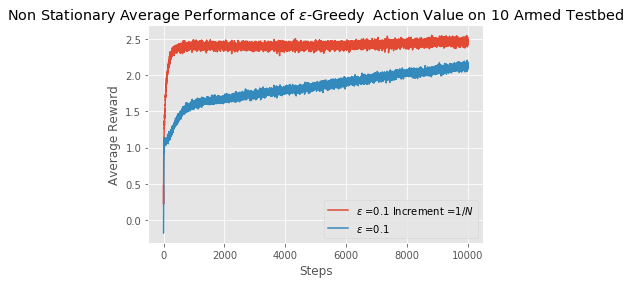

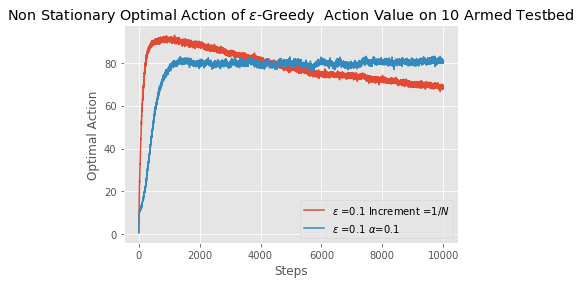

In [0]:
excercise_2_5()

# Figure 2.3

In [0]:
def plotFig_2_3():

	plt.figure()

	print("*"*20+"Q = 5 eps = 0"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
		nonStationary=False,epsilon = 0.0,alphaUpdateRule=True,optimalConditions=True)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()

	plt.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label = "Optimistic, greedy\n" +r"$Q_{1}$ "+ "=5, "+r"$\epsilon$"+" =0")

	del(banditObject)

	print("*"*20+"Q = 0 eps = 0.1"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
		nonStationary=False,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()

	plt.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label = "Realistic, "+r"$\epsilon$"+"-greedy\n"+r"$Q_{1}$ "+ "=1, "+r"$\epsilon$"+" =0.1")

	plt.title("Effect of Optimistic Intial Action Value on 10 Armed Testbed")
	plt.xlabel("Steps")
	plt.ylabel("% Optimistic Action")
	plt.legend()
	plt.savefig('fig_2_3.png',dpi=300)
	plt.show()


  1%|          | 8/1000 [00:00<00:12, 77.46it/s]

********************Q = 5 eps = 0********************
********************************************************************************
EPSILON:  0.0
NON-STATIONARY:  False
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  True


  1%|          | 8/1000 [00:00<00:12, 76.46it/s]

********************Q = 0 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  False
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  False


100%|██████████| 1000/1000 [00:13<00:00, 73.30it/s]


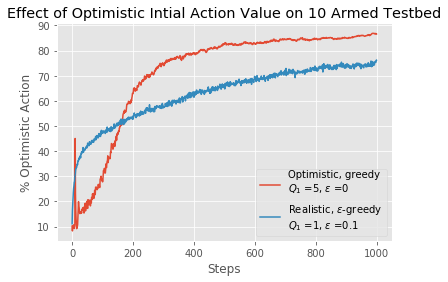

In [0]:
plotFig_2_3()

#figure 2.3 For Non Stationary

In [0]:
def plotFig_2_3_non_stationary():

	plt.figure()

	print("*"*20+"Q = 5 eps = 0"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=10000,numberOfbandits=2000,actionType = "normal",
		nonStationary=True,epsilon = 0.0,alphaUpdateRule=True,optimalConditions=True)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()

	plt.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label = "Optimistic, greedy\n" +r"$Q_{1}$ "+ "=5, "+r"$\epsilon$"+" =0")

	del(banditObject)

	print("*"*20+"Q = 0 eps = 0.1"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=10000,numberOfbandits=2000,actionType = "normal",
		nonStationary=True,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()

	plt.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label = "Realistic, "+r"$\epsilon$"+"-greedy\n"+r"$Q_{1}$ "+ "=1, "+r"$\epsilon$"+" =0.1")

	plt.title(" Effect of Optimistic Intial Action Value on 10 Armed Testbed")
	plt.xlabel("Steps")
	plt.ylabel("% Optimistic Action")
	plt.legend()
	plt.savefig('fig_2_3_non_stationary.png',dpi=300)
	plt.show()
	

  0%|          | 8/10000 [00:00<02:21, 70.51it/s]

********************Q = 5 eps = 0********************
********************************************************************************
EPSILON:  0.0
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  True


  0%|          | 8/10000 [00:00<02:21, 70.80it/s]

********************Q = 0 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  False


100%|██████████| 10000/10000 [02:28<00:00, 67.44it/s]


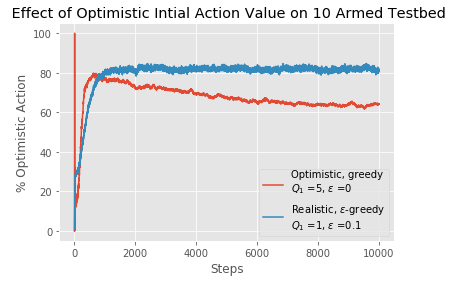

In [0]:
plotFig_2_3_non_stationary()

# Comparison  of UCB to Optimistic Value and e-greedy for Stationary Rewards 

In [0]:
def plotFig_2_4_1():

	fig1=plt.figure()
	ax1=plt.subplot(111)
	fig2=plt.figure()
	ax2=plt.subplot(111)
  
  

	print("*"*20+"UCB  C=2"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "UCB",
			nonStationary=False,epsilon = 0.1,alphaUpdateRule=False,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label="UCB " +r"$c$"+"=2")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label="UCB " +r"$c$"+"=2")
  
  
  
	del(banditObject)
	
	print("*"*20+"Q = 5 eps = 0.1"+"*"*20)
	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
			nonStationary=False,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=True)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label="Optimistic "+r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label="Optimistic "+r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
  
  
  
  
	print("*"*20+"Q = 0 eps = 0.1"+"*"*20)
	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
			nonStationary=False,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
  ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label=r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label=r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
  
  
	
	
	ax1.title.set_text("UCB to Optimistic Value and "+r"$\epsilon$"+"-greedy for Stationary")
	ax1.set_xlabel("Steps")
	ax1.set_ylabel("Average Reward")
	ax1.legend()
	fig1.savefig('fig_2_4_1_stationary.png',dpi=300)
  
  
  
	ax2.title.set_text("UCB to Optimistic Value and "+r"$\epsilon$"+"-greedy for Stationary")
	ax2.set_xlabel("Steps")
	ax2.set_ylabel("% Optimistic Action")
	ax2.legend()
	fig2.savefig('fig_2_4_2_stationary.png',dpi=300)


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
  0%|          | 3/1000 [00:00<00:40, 24.62it/s]

********************UCB  C=2********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  False
ACTION TYPE:  UCB
ALPHA UPDATE RULE:  False
OPTIMAL CONDITIONS:  False


  1%|          | 8/1000 [00:00<00:12, 76.84it/s]

********************Q = 5 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  False
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  True


  1%|          | 8/1000 [00:00<00:12, 76.94it/s]

********************Q = 0 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  False
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  False


100%|██████████| 1000/1000 [00:13<00:00, 74.43it/s]


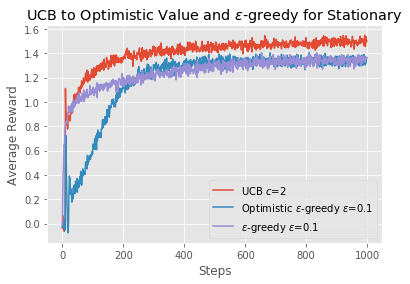

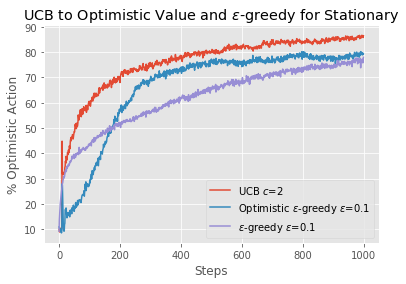

In [13]:
plotFig_2_4_1()

# Comparsion of UCB to Optimistic Value and e-greedy for Non Stationary Rewards 

In [0]:
def plotFig_2_4_2():

	fig1=plt.figure()
	ax1=plt.subplot(111)
	fig2=plt.figure()
	ax2=plt.subplot(111)
  

	print("*"*20+"UCB  C=2"+"*"*20)

	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "UCB",
			nonStationary=True,epsilon = 0.1,alphaUpdateRule=False,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label="UCB " +r"$c$"+"=2")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label="UCB " +r"$c$"+"=2")
  
	
	
	print("*"*20+"Q = 5 eps = 0.1"+"*"*20)
	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
			nonStationary=True,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=True)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label="Optimistic "+r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label="Optimistic "+r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
  
  
  
  
	print("*"*20+"Q = 0 eps = 0.1"+"*"*20)
	banditObject = banditClass(k=10,numberOfIterations=1000,numberOfbandits=2000,actionType = "normal",
			nonStationary=True,epsilon = 0.1,alphaUpdateRule=True,optimalConditions=False)

	currrentTotalRewards, currentOptimalActions = banditObject.simulate()
	
	ax1.plot(np.arange(banditObject.numberOfIterations),currrentTotalRewards,label=r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
	ax2.plot(np.arange(banditObject.numberOfIterations),currentOptimalActions,label=r'$\epsilon$'+"-greedy "+r'$\epsilon$'+"=0.1")
  
  
	
	ax1.title.set_text("UCB to optimistic value and "+r"$\epsilon$"+"-greedy for non stationary")
	ax1.set_xlabel("Steps")
	ax1.set_ylabel("Average Reward")
	ax1.legend()
	fig1.savefig('fig_2_4_1_non_stationary.png',dpi=300)
  
  
  
	ax2.title.set_text("UCB to optimistic value and "+r"$\epsilon$"+"-greedy for non stationary")
	ax2.set_xlabel("Steps")
	ax2.set_ylabel("% Optimistic Action")
	ax2.legend()
	fig2.savefig('fig_2_4_2_non_stationary.png',dpi=300)


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
  0%|          | 4/1000 [00:00<00:30, 32.44it/s]

********************UCB  C=2********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  UCB
ALPHA UPDATE RULE:  False
OPTIMAL CONDITIONS:  False


  1%|          | 8/1000 [00:00<00:14, 70.57it/s]

********************Q = 5 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  True


  1%|          | 8/1000 [00:00<00:13, 71.89it/s]

********************Q = 0 eps = 0.1********************
********************************************************************************
EPSILON:  0.1
NON-STATIONARY:  True
ACTION TYPE:  normal
ALPHA UPDATE RULE:  True
OPTIMAL CONDITIONS:  False


100%|██████████| 1000/1000 [00:14<00:00, 69.79it/s]


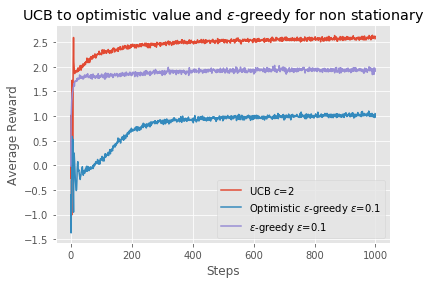

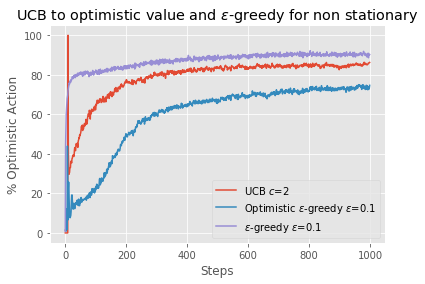

In [18]:
plotFig_2_4_2()